In [42]:
### Stuff one needs
#! pip install SoundFile
#! pip install pandas
#! pip install torchaudio
#! pip install matplotlib
#! pip install pyaudio 
#! pip install pydub

In [43]:
# Imports
import wave
import tarfile

# As
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# From
from pathlib import Path
from pydub import AudioSegment

# Pytorch
import torchaudio

# Internals|helpers
from helpers import play_audio, extract_metadata 

In [44]:
# CONFIG
COMBINED = False # Keep False, a tool to combine audio recordings for testing purposes only

# Files
FILE = Path('LJ025-0076.wav')
FILE2 = Path('LJ025-0073.wav')
METADATA = Path('metadata.csv')

# Folders
FOLDER_LJ = Path('data/LJSpeech-1.1/')
FOLDER_WAV = Path('data/LJSpeech-1.1/wavs')

# Set default stuff 
torchaudio.set_audio_backend("soundfile") 

In [45]:
# Extract data from LJSpeech (https://keithito.com/LJ-Speech-Dataset/)
if FOLDER_WAV.is_dir() == False: 
    with tarfile.open("data/LJSpeech-1.1.tar.bz2", "r:bz2") as tar:
        tar.extractall("data/")

# Extracting metadata
df_metadata = extract_metadata(FOLDER_LJ / METADATA)
df_metadata.head()

,filenames,text,text2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...


In [46]:
df_metadata['text'].iloc[0:5]

0    Printing, in the only sense with which we are ...
1                       in being comparatively modern.
2    For although the Chinese took impressions from...
3    produced the block books, which were the immed...
4    the invention of movable metal letters in the ...
Name: text, dtype: object

In [47]:
# Find all characters in the LJSpeech 
charset =  sorted(list(set(' '.join(map(str,df_metadata['text'].tolist())))))
charset = ''.join(charset)
charset

' !"$&\'(),-.0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]abcdefghijklmnopqrstuvwxyz|£àâèéêü’“”'

In [48]:
# Look into the data
characters_max = np.max([len(x) for x in df_metadata['text']])
print(f'Max characters: {characters_max}')
print(f'Max length for LJSpeech-1.1: {1114}') # Hardcoded

Max characters: 331
Max length for LJSpeech-1.1: 1114


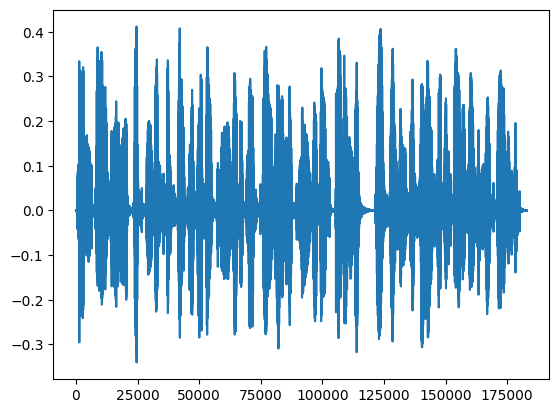

In [49]:
# Take a deeper look at an example file 
waveform, sample_rate = torchaudio.load(FOLDER_WAV / FILE)
waveform_np = waveform.numpy()

plt.plot(np.arange(waveform_np.shape[1]),waveform_np[0]);

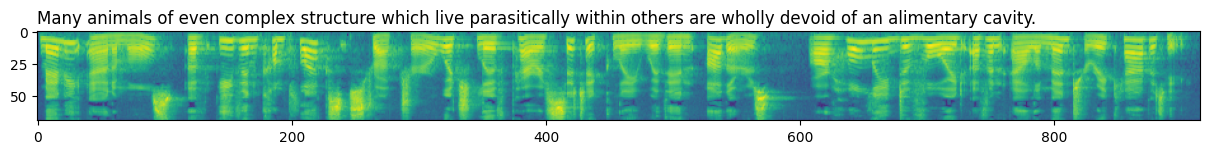

In [50]:
# Create spectrogram
MELS = 70

transform = torchaudio.transforms.MelSpectrogram(sample_rate, n_mels=MELS)
mel_spectrogram = transform(waveform)

# Find the [FILE] label matching the spectrogram 
idx = [[idx,x] for idx, x in enumerate(df_metadata['filenames']) if FILE.stem in x]
df_sample = df_metadata.iloc[idx[0][0]]

mel_spectrogram_log = np.log(mel_spectrogram[0])

# Plot spectrogram
fig = plt.figure(figsize=(15, 10))
plt.title(df_sample['text'], loc='left')
plt.imshow(mel_spectrogram_log, cmap = 'viridis');

In [51]:
# Play the audio file
f = wave.open(str(FOLDER_WAV / FILE),"rb")  
play_audio(f) 

if COMBINED == True:
    wav_1 = AudioSegment.from_wav(str(FOLDER_WAV / FILE))
    wav_2 = AudioSegment.from_wav(str(FOLDER_WAV / FILE2))

    combined_sounds = wav_1 + wav_2
    combined_sounds.export("data//hax.wav", format="wav")
    f_combined = wave.open("data/hax.wav","rb")   
    
    play_audio(f_combined)  